In [1]:
from pathlib import Path

import pandas
import numpy as np
import torch
import sklearn.decomposition
import sklearn.cluster
import matplotlib.pyplot as plt

from PIL import Image
import tqdm

import timm

IMG_ROOT = Path.home() / "LocalProjects/datasets/im2gps/outputs/img"
DEVICE = "cuda"

/home/fyhuang/dev/mlenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

model = timm.create_model(
    'vit_base_patch16_clip_224.laion2b_ft_in12k_in1k',
    pretrained=True,
    num_classes=0, # remove classifier
).to(DEVICE).eval()

data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

In [2]:
df_07 = pandas.read_pickle(Path.home() / "LocalProjects/datasets/im2gps/outputs/im2gps_2007.pkl")

def annotate_img_paths(dataset_df):
    img_paths = []
    for row in tqdm.tqdm(dataset_df.itertuples(), total=len(dataset_df.index), desc="Writing img_paths"):
        row_subdir = "{}/{:05d}".format(row.tag, row.Index//1000)
        row_filename_stem = f"{row.id}_{row.secret}_{row.server}_{row.owner}"
        img_paths.append(f"{row_subdir}/{row_filename_stem}.jpg")

    dataset_df["img_path"] = img_paths

annotate_img_paths(df_07)
df_07.columns

Writing img_paths: 100%|██████████| 591441/591441 [00:01<00:00, 388657.24it/s]


Index(['id', 'owner', 'secret', 'server', 'farm', 'title', 'ispublic',
       'isfriend', 'isfamily', 'dateupload', 'latitude', 'longitude',
       'accuracy', 'context', 'place_id', 'woeid', 'geo_is_public',
       'geo_is_contact', 'geo_is_friend', 'geo_is_family', 'interestingness',
       'tag', 'split', 'img_path'],
      dtype='object')

In [3]:
df_23 = pandas.read_pickle(Path.home() / "LocalProjects/datasets/im2gps/outputs/im2gps_2023.pkl")
df_23.columns

Index(['id', 'owner', 'secret', 'server', 'farm', 'title', 'ispublic',
       'isfriend', 'isfamily', 'dateupload', 'latitude', 'longitude',
       'accuracy', 'context', 'place_id', 'woeid', 'geo_is_public',
       'geo_is_contact', 'geo_is_friend', 'geo_is_family', 'interestingness',
       'tag', 'img_path'],
      dtype='object')

In [5]:
df_combined = pandas.concat([df_07, df_23], ignore_index=True)
df_combined.to_pickle(Path.home() / "LocalProjects/datasets/im2gps/outputs/im2gps_combined.pkl")
df_combined

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,dateupload,...,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family,interestingness,tag,split,img_path
0,398492752,17392647@N00,e3152820b2,169,1,Tokyo roads,1,0,0,1172128070,...,cLK5.HBQU7vUgaJM,1112372.0,1,0,0,0,0,Tokyo,train,Tokyo/00000/398492752_e3152820b2_169_17392647@...
1,399391800,18063597@N00,3b9c65a793,180,1,kagoshima; sunset of shibushi,1,0,0,1172202141,...,V76rittTWrkjLNIbDQ,28379412.0,1,0,0,0,1,Tokyo,train,Tokyo/00000/399391800_3b9c65a793_180_18063597@...
2,397737291,88468856@N00,f7572f28ed,164,1,fall into despair,1,0,0,1172074105,...,FRthiQZQU7uKHvmP,1118370.0,1,0,0,0,2,Tokyo,train,Tokyo/00000/397737291_f7572f28ed_164_88468856@...
3,391903677,58776404@N00,0d983cd099,131,1,[Kichijouji]_070213_085 Enpty Line,1,0,0,1171618333,...,2Eh6._NQV7rv6f0AjQ,15015379.0,1,0,0,0,3,Tokyo,train,Tokyo/00000/391903677_0d983cd099_131_58776404@...
4,397665565,36516818@N00,c3160578b6,149,1,City View,1,0,0,1172068796,...,,26198557.0,1,0,0,0,4,Tokyo,train,Tokyo/00000/397665565_c3160578b6_149_36516818@...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648397,53144138701,30318433@N03,672fdf6431,65535,66,"Dawn in Oceanport, New Jersey",1,0,0,1693113363,...,,5102180.0,1,0,0,0,228,UnitedStates,NaN,UnitedStates/00555/53144138701_672fdf6431_6553...
1648398,53313180588,12494104@N00,87cd4ec647,65535,66,Riddlesden 1221,1,0,0,1699259898,...,,2645889.0,1,0,0,0,19,england,NaN,england/01154/53313180588_87cd4ec647_65535_124...
1648399,52812772512,7702423@N04,4e1dd6ce86,65535,66,Trumpeter and Mute Swans during Runyon's Visit...,1,0,0,1681349331,...,,4993764.0,1,0,0,0,247,Michigan,NaN,Michigan/00387/52812772512_4e1dd6ce86_65535_77...
1648400,53276266094,146757535@N05,cd237d57e8,65535,66,7R506578-Enhanced-NR,1,0,0,1697960450,...,,5190769.0,1,0,0,0,124,UnitedStates,NaN,UnitedStates/00565/53276266094_cd237d57e8_6553...


In [9]:
sample_img = Image.open(IMG_ROOT / df_combined.img_path.iloc[0])
sample_embedding = model(transforms(sample_img).unsqueeze(0).to(DEVICE))
sample_embedding.shape # (1, 768)

torch.Size([1, 768])

In [13]:
# Iterate through all images and produce an embedding vector for each
class Embedder:
    BATCH_SIZE = 32

    def __init__(self):
        self.embeddings_raw = np.zeros((len(df_combined.index), 768), dtype=np.float32)

        self.batch_row = 0
        self.batch = torch.zeros(self.BATCH_SIZE, 3, 224, 224)
        self.batch_indexes = []

    def process_batch(self):
        batch = self.batch.to(DEVICE)
        embedding = model(batch).detach().cpu().numpy()
        for i in range(self.BATCH_SIZE):
            self.embeddings_raw[self.batch_indexes[i]] = embedding[i]

        self.batch_row = 0
        self.batch_indexes.clear()

    def process_rows(self):
        for row in tqdm.tqdm(df_combined.itertuples(), total=len(df_combined.index), desc="Embedding images"):
            img_path = IMG_ROOT / row.img_path
            if not img_path.exists():
                print(f"Missing: {img_path}")
                continue
            img = Image.open(img_path).convert('RGB')
            
            self.batch[self.batch_row] = transforms(img)
            self.batch_indexes.append(row.Index)
            self.batch_row += 1

            if self.batch_row >= self.BATCH_SIZE:
                self.process_batch()

        #self.process_batch()

e = Embedder()
e.process_rows()

Embedding images:   0%|          | 5151/1648402 [03:10<11:12:20, 40.73it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Tokyo/00005/1085920765_ad1c7d8fa9_1266_49433291@N00.jpg


Embedding images:   1%|          | 19242/1648402 [11:56<19:11:02, 23.59it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewYorkCity/00020/1078273459_ba25fd4744_253_11241023@N03.jpg


Embedding images:   1%|▏         | 22602/1648402 [13:56<18:00:28, 25.08it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Cairo/00023/663834945_a079099268_1430_9461373@N05.jpg


Embedding images:   2%|▏         | 39540/1648402 [23:59<15:47:04, 28.31it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/London/00040/761679623_478e76273e_1064_7271182@N05.jpg


Embedding images:   3%|▎         | 52420/1648402 [31:37<10:08:57, 43.68it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Lagos/00054/407608297_07241bc73e_160_64479867@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Lagos/00054/402087500_583c9beae8_125_64479867@N00.jpg


Embedding images:   3%|▎         | 52470/1648402 [31:39<14:17:31, 31.02it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Lagos/00054/400596612_2b7b191fa5_165_64479867@N00.jpg


Embedding images:   4%|▍         | 72934/1648402 [43:42<10:38:37, 41.12it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Johannesburg/00075/1062894107_fd59d09303_1361_82927779@N00.jpg


Embedding images:   5%|▍         | 77414/1648402 [46:21<10:00:19, 43.61it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00079/516282194_62b5138a31_197_7386758@N03.jpg


Embedding images:   5%|▍         | 77443/1648402 [46:22<10:18:44, 42.32it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00079/508265658_166b9805ae_189_68402321@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00079/507003517_1b58e12db1_223_72744295@N00.jpg


Embedding images:   5%|▍         | 77483/1648402 [46:23<9:23:19, 46.48it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00079/507038968_e162643731_229_72744295@N00.jpg


Embedding images:   5%|▍         | 77512/1648402 [46:24<10:25:51, 41.83it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00079/520934283_cd80fcb18f_250_98604724@N00.jpg


Embedding images:   5%|▍         | 77540/1648402 [46:25<10:52:46, 40.11it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00079/510248342_ea090b8bce_209_55976115@N00.jpg


Embedding images:   5%|▍         | 77548/1648402 [46:25<9:22:06, 46.58it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00079/518279674_66164a1b82_242_68402321@N00.jpg


Embedding images:   5%|▍         | 77580/1648402 [46:27<10:29:07, 41.61it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00080/518368033_071a39a4f9_234_68402321@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00080/510268489_30006e3449_225_55976115@N00.jpg


Embedding images:   5%|▍         | 77598/1648402 [46:27<13:43:48, 31.78it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Philadelphia/00080/512893126_f0eab6398c_225_37941646@N00.jpg


Embedding images:   5%|▌         | 86631/1648402 [51:46<11:56:08, 36.35it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Toronto/00089/1474757480_25b4ba2555_197_11241023@N03.jpg


Embedding images:   5%|▌         | 88828/1648402 [53:04<16:51:10, 25.71it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Ruhr/00091/418591170_9240bfaa7a_164_64479867@N00.jpg


Embedding images:   6%|▌         | 92173/1648402 [55:00<11:10:16, 38.70it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Barcelona/00094/530275033_7d28f9e977_1072_8478907@N02.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Barcelona/00094/530235840_6f7cecde54_1417_8478907@N02.jpg


Embedding images:   6%|▌         | 93489/1648402 [55:46<10:00:16, 43.17it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Barcelona/00096/928062645_969931a126_1074_64479867@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Barcelona/00096/928799316_65d99d239c_1310_64479867@N00.jpg


Embedding images:   8%|▊         | 127696/1648402 [1:15:53<10:33:37, 40.00it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/823488441_6c702c6669_1186_73118068@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/764535102_d8a7de4614_1079_25411105@N00.jpg


Embedding images:   8%|▊         | 127729/1648402 [1:15:54<10:22:56, 40.69it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/789075936_fff3b1c461_1358_8435962@N06.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/780343443_97085085ee_1213_18353002@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/826920429_fda619a117_1014_10132497@N04.jpg


Embedding images:   8%|▊         | 127757/1648402 [1:15:55<12:18:32, 34.32it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/789144936_af18b59958_1353_8435962@N06.jpg


Embedding images:   8%|▊         | 127771/1648402 [1:15:55<9:29:42, 44.49it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/758274521_86c66afafe_1115_41754906@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/831706250_0388afda02_1034_74903796@N00.jpg


Embedding images:   8%|▊         | 127797/1648402 [1:15:56<11:16:45, 37.45it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/759109094_5cf88bfb41_1410_41754906@N00.jpg


Embedding images:   8%|▊         | 127839/1648402 [1:15:57<9:31:18, 44.36it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/814196044_b71635090d_1034_24127388@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/830994405_80c0f1aecd_1243_74903796@N00.jpg


Embedding images:   8%|▊         | 127857/1648402 [1:15:58<13:46:19, 30.67it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/831154069_3a4e2d6c0b_1177_14289921@N00.jpg


Embedding images:   8%|▊         | 127876/1648402 [1:15:58<8:33:47, 49.32it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/902635594_501f527997_1408_87889801@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/843526376_1da5f2e29b_1229_97719890@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00130/842621359_3736a1f9d7_1365_97719890@N00.jpg


Embedding images:   8%|▊         | 129504/1648402 [1:16:56<10:52:04, 38.82it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1089599415_47099f4c5d_1002_11327163@N06.jpg


Embedding images:   8%|▊         | 129533/1648402 [1:16:58<12:40:02, 33.31it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1083456067_45532f91ac_1099_67393654@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1105651384_a57a45e240_1434_9875429@N07.jpg


Embedding images:   8%|▊         | 129576/1648402 [1:16:59<9:55:13, 42.53it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1176515596_985d0ec2ae_1170_83244649@N00.jpg


Embedding images:   8%|▊         | 129595/1648402 [1:17:00<13:30:03, 31.25it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1175768365_53bcb87bf8_1388_83244649@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1175665289_436c67ba62_1195_83244649@N00.jpg


Embedding images:   8%|▊         | 129610/1648402 [1:17:00<11:03:42, 38.14it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1171582535_065b9b81af_1104_44504403@N00.jpg


Embedding images:   8%|▊         | 129646/1648402 [1:17:01<9:42:05, 43.49it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1218225249_7c28a0680e_1031_27403767@N00.jpg


Embedding images:   8%|▊         | 129677/1648402 [1:17:02<10:09:05, 41.56it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1210427652_ad5ea691fb_1314_9149465@N03.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1201628062_aaafd9ffa9_1227_7393833@N05.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1189329151_d4b0a1bffa_1124_9710967@N02.jpg


Embedding images:   8%|▊         | 129745/1648402 [1:17:05<9:20:50, 45.13it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1189485739_3f7e1ce190_1386_9710967@N02.jpg


Embedding images:   8%|▊         | 129765/1648402 [1:17:06<12:06:35, 34.83it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1221761977_bddb39eafb_1055_86204381@N00.jpg


Embedding images:   8%|▊         | 129807/1648402 [1:17:07<10:14:51, 41.16it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1254123313_bc074040cb_1045_57453294@N00.jpg


Embedding images:   8%|▊         | 129819/1648402 [1:17:08<16:44:19, 25.20it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1267403946_314017d882_1004_71604449@N00.jpg


Embedding images:   8%|▊         | 129844/1648402 [1:17:08<9:26:14, 44.70it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1238083472_a420a611db_1297_20688578@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00132/1269578925_f287fcd40d_1047_7393833@N05.jpg


Embedding images:   8%|▊         | 130420/1648402 [1:17:29<9:00:25, 46.81it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00133/1322596028_758c49293e_1347_41813589@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00133/1333403019_31ca015408_1264_80709451@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00133/1364487675_5c5576b163_1237_33953640@N00.jpg


Embedding images:   8%|▊         | 130491/1648402 [1:17:31<9:50:27, 42.84it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00133/1356591769_3482239f82_1278_11323731@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/SanFrancisco/00133/1361521182_45cc6c36a1_1421_64415943@N00.jpg


Embedding images:  10%|█         | 165116/1648402 [1:37:52<9:11:24, 44.83it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/florence/00169/1434965965_ece8bd68d1_1114_32109022@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/florence/00169/1407800556_05fa6199a0_1403_90176782@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/florence/00169/1424138660_c4db52d385_1410_7548708@N03.jpg


Embedding images:  11%|█         | 182142/1648402 [1:47:58<9:43:26, 41.89it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/California/00186/456590215_287ac39f4d_219_28617330@N00.jpg


Embedding images:  11%|█         | 182196/1648402 [1:48:00<12:51:06, 31.69it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/California/00186/469584190_4069a1c133_198_69159674@N00.jpg


Embedding images:  11%|█         | 182425/1648402 [1:48:08<11:23:43, 35.74it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/California/00186/456574522_751f0fe1c1_206_28617330@N00.jpg


Embedding images:  12%|█▏        | 204721/1648402 [2:01:53<15:20:08, 26.15it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00210/627761189_3855fb2495_1014_8432934@N03.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00210/627760003_372b0a3aa0_1166_8432934@N03.jpg


Embedding images:  12%|█▏        | 204738/1648402 [2:01:53<11:31:51, 34.78it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00210/443264525_697af5a9b0_175_95922884@N00.jpg


Embedding images:  12%|█▏        | 204753/1648402 [2:01:54<16:26:03, 24.40it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00210/451277203_74bd36395c_210_26474433@N00.jpg


Embedding images:  12%|█▏        | 204768/1648402 [2:01:55<11:45:54, 34.08it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00210/451259846_d2f7e7e064_169_26474433@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00210/444626277_1962863c43_176_7416764@N02.jpg


Embedding images:  13%|█▎        | 209192/1648402 [2:04:40<9:40:55, 41.29it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00214/1420680905_66a27da07e_1348_72492209@N00.jpg


Embedding images:  13%|█▎        | 209218/1648402 [2:04:41<11:45:48, 33.98it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00214/1457292942_68105068ca_1365_68362569@N00.jpg


Embedding images:  13%|█▎        | 209224/1648402 [2:04:41<10:24:02, 38.44it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Hawaii/00214/1457348739_89b6add940_1392_10235948@N05.jpg


Embedding images:  21%|██▏       | 353693/1648402 [3:30:51<11:03:09, 32.54it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Turkey/00373/1160148097_f218dda836_1387_10705286@N06.jpg


Embedding images:  22%|██▏       | 355268/1648402 [3:31:47<10:01:04, 35.86it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Iran/00375/1413211944_172affff45_1181_9152508@N02.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Iran/00375/1413246704_bc85af0a0b_1113_9152508@N02.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Iran/00375/1412364995_f041f7dfdd_1425_9152508@N02.jpg


Embedding images:  22%|██▏       | 355368/1648402 [3:31:51<9:25:17, 38.12it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Iran/00375/1448091356_f6d9bbc720_1231_9152508@N02.jpg


Embedding images:  26%|██▋       | 434796/1648402 [4:18:28<7:51:58, 42.86it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Syria/00461/445473406_acc1415102_215_91684904@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Syria/00461/474615422_5baeff4b2b_192_86088624@N00.jpg


Embedding images:  28%|██▊       | 464787/1648402 [4:36:05<7:13:03, 45.55it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Belgium/00493/747822654_39fa61a12b_1113_9532859@N02.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Belgium/00493/780157450_0de819f00c_1209_65755449@N00.jpg


Embedding images:  28%|██▊       | 464806/1648402 [4:36:06<10:17:04, 31.97it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Belgium/00493/793791268_b7bb914bed_1153_71761602@N00.jpg


Embedding images:  29%|██▊       | 472992/1648402 [4:40:56<14:01:58, 23.27it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Bolivia/00501/1500443093_65fd91cb8f_220_66096436@N00.jpg


Embedding images:  31%|███       | 505541/1648402 [5:00:08<10:30:36, 30.21it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/CostaRica/00535/512974469_e7fda28e58_230_45357681@N00.jpg


Embedding images:  31%|███▏      | 518860/1648402 [5:07:58<8:48:17, 35.64it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1471774464_4599d754e2_1026_14031274@N07.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1462282330_d127abf0c4_1398_31508066@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1467580900_a899a709a3_1133_28495173@N00.jpg


Embedding images:  31%|███▏      | 518906/1648402 [5:07:59<7:17:18, 43.05it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1452805589_fbd90334d1_1130_32917637@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1452739890_fa61b54c0b_1068_32917637@N00.jpg


Embedding images:  31%|███▏      | 518930/1648402 [5:08:00<8:41:23, 36.10it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1469436319_fbb9a3d54f_1097_87615810@N00.jpg


Embedding images:  31%|███▏      | 518943/1648402 [5:08:00<7:19:47, 42.80it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1456400158_36ff1985f6_1115_78165705@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1436564641_a836a59c68_1261_56032966@N00.jpg


Embedding images:  31%|███▏      | 518971/1648402 [5:08:01<8:35:31, 36.51it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1462459326_abbdeb9fe7_1068_31508066@N00.jpg


Embedding images:  31%|███▏      | 518988/1648402 [5:08:02<11:16:37, 27.82it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1455356702_a7e90aad27_1162_39443454@N00.jpg


Embedding images:  31%|███▏      | 519005/1648402 [5:08:03<7:37:55, 41.11it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1464976185_2e713e9c90_1028_12395592@N03.jpg


Embedding images:  31%|███▏      | 519057/1648402 [5:08:05<10:54:13, 28.77it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/NewZealand/00549/1461341921_90ecf12faa_1341_76384935@N00.jpg


Embedding images:  32%|███▏      | 523070/1648402 [5:10:27<7:14:51, 43.13it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/1213756309_f68ba555bb_1061_11983943@N02.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/1749191471_bfe188b2af_2290_98169284@N00.jpg


Embedding images:  32%|███▏      | 523105/1648402 [5:10:28<8:01:21, 38.96it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/1931510536_423c26cb02_2404_7821190@N03.jpg


Embedding images:  32%|███▏      | 523129/1648402 [5:10:29<8:22:36, 37.31it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/1350807786_e73d96b59f_1199_99658976@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/2162901235_df8a4de6a5_2194_22521000@N08.jpg


Embedding images:  32%|███▏      | 523160/1648402 [5:10:30<10:00:55, 31.21it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/1504841834_542435aa3f_2363_48974735@N00.jpg


Embedding images:  32%|███▏      | 523178/1648402 [5:10:31<7:26:50, 41.97it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/2121215952_65a2ebe285_2198_12523684@N03.jpg


Embedding images:  32%|███▏      | 523191/1648402 [5:10:31<11:30:59, 27.14it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/480486992_b6653fb742_198_8079188@N04.jpg


Embedding images:  32%|███▏      | 523235/1648402 [5:10:33<7:48:18, 40.04it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Albania/00553/1263128338_159d30d563_1277_12313196@N06.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Kuwait/00553/564335529_3945f0d2cd_1177_8078536@N07.jpg


Embedding images:  32%|███▏      | 523242/1648402 [5:10:33<6:54:08, 45.28it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Kuwait/00553/513996720_94befbbe9a_191_10136713@N00.jpg


Embedding images:  32%|███▏      | 527276/1648402 [5:12:52<6:31:42, 47.70it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00557/538447772_3117f51b97_1132_8789200@N07.jpg


Embedding images:  32%|███▏      | 527300/1648402 [5:12:53<7:44:30, 40.23it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00557/538446242_7f9f5ac644_1106_8789200@N07.jpg


Embedding images:  32%|███▏      | 527332/1648402 [5:12:54<8:29:23, 36.68it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00558/993766981_8bc20336c4_1152_36247185@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00558/949766626_17a68a09c6_1156_28919408@N00.jpg


Embedding images:  32%|███▏      | 527369/1648402 [5:12:55<7:48:07, 39.91it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00558/735864242_6b87938f91_1381_72608734@N00.jpg


Embedding images:  32%|███▏      | 527377/1648402 [5:12:55<6:48:22, 45.75it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00558/931411112_7d034c2ef5_1146_13566646@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00558/747178368_9295714e9f_1319_9549670@N05.jpg


Embedding images:  32%|███▏      | 527398/1648402 [5:12:56<9:03:44, 34.36it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00558/746277537_fba6373395_1379_9549670@N05.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Namibia/00558/734743407_3d3ada73f0_1306_72608734@N00.jpg


Embedding images:  32%|███▏      | 531569/1648402 [5:15:24<7:23:31, 41.97it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Fiji/00562/455954571_6b41ea0e45_202_99018895@N00.jpg


Embedding images:  32%|███▏      | 531652/1648402 [5:15:27<11:42:01, 26.51it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Fiji/00562/453578428_8a77ccedb7_181_62008870@N00.jpg


Embedding images:  32%|███▏      | 531676/1648402 [5:15:27<6:16:43, 49.41it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Fiji/00562/453582212_ff1925c09f_181_62008870@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Fiji/00562/453589221_e35859b4f4_180_62008870@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Fiji/00562/453577068_6dd0e12ce3_211_62008870@N00.jpg


Embedding images:  33%|███▎      | 540555/1648402 [5:20:36<10:09:02, 30.32it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Belize/00571/979867817_cd0202d403_1100_7255195@N05.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Belize/00571/980140376_91f4a73b9b_1159_7255195@N05.jpg


Embedding images:  33%|███▎      | 540574/1648402 [5:20:37<7:09:45, 42.96it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Belize/00571/980263820_9faf703605_1165_7255195@N05.jpg


Embedding images:  33%|███▎      | 540627/1648402 [5:20:39<8:47:02, 35.03it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Belize/00571/980215717_03b7591bb8_1080_7255195@N05.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Belize/00571/979964099_9fc18e8687_1051_7255195@N05.jpg


Embedding images:  33%|███▎      | 540639/1648402 [5:20:39<7:48:41, 39.39it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Barbados/00571/482011714_e344823615_207_56083207@N00.jpg


Embedding images:  33%|███▎      | 540664/1648402 [5:20:40<8:17:05, 37.14it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Barbados/00571/456485088_d906bb8927_183_7736364@N05.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Barbados/00571/436145279_a35d7736c3_155_35947958@N00.jpg


Embedding images:  33%|███▎      | 540693/1648402 [5:20:41<10:34:38, 29.09it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Barbados/00571/456549247_cddb221263_254_7736364@N05.jpg


Embedding images:  33%|███▎      | 544549/1648402 [5:22:59<7:19:07, 41.90it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1070751620_e8fb01be29_1344_10824876@N04.jpg


Embedding images:  33%|███▎      | 544568/1648402 [5:23:00<9:46:44, 31.35it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1087801426_ae7c288b62_1225_9960342@N08.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1121198856_e0aa4291b9_1167_13046722@N00.jpg


Embedding images:  33%|███▎      | 544579/1648402 [5:23:00<8:07:03, 37.77it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1162084926_a3975d65ab_1091_70715193@N00.jpg


Embedding images:  33%|███▎      | 544599/1648402 [5:23:01<9:39:48, 31.73it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1127200872_1de9ed9d75_1092_13259518@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1172447592_91eb733507_1389_13259518@N00.jpg


Embedding images:  33%|███▎      | 544611/1648402 [5:23:01<8:01:42, 38.19it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1216507598_48e7456b86_1397_98813101@N00.jpg


Embedding images:  33%|███▎      | 544678/1648402 [5:23:03<8:11:20, 37.44it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1155710642_8a3810a521_1165_11649867@N02.jpg


Embedding images:  33%|███▎      | 544683/1648402 [5:23:04<7:43:26, 39.69it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/Jersey/00576/1066208153_058ee22075_1051_9825442@N03.jpg


Embedding images:  34%|███▍      | 566822/1648402 [5:36:06<8:08:22, 36.91it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/460238216_2f67fa3e99_247_52439376@N00.jpg


Embedding images:  34%|███▍      | 566865/1648402 [5:36:07<6:35:04, 45.63it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/453672079_02413b0adc_225_79063097@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/454375364_bd0e0a5024_170_28591040@N00.jpg


Embedding images:  34%|███▍      | 566883/1648402 [5:36:08<10:08:47, 29.61it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/453860015_fa2ce9ceed_227_82552445@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/454370031_1829a74808_233_28591040@N00.jpg


Embedding images:  34%|███▍      | 566900/1648402 [5:36:08<7:19:30, 41.01it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/454356345_09a5a1cb8e_183_28591040@N00.jpg


Embedding images:  34%|███▍      | 566924/1648402 [5:36:09<8:01:35, 37.43it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/450489850_6afa138275_195_79002546@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/457683109_436121cef8_241_10541353@N00.jpg


Embedding images:  34%|███▍      | 566930/1648402 [5:36:09<7:19:43, 40.99it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/454658889_ada7e5492f_252_12614553@N00.jpg


Embedding images:  34%|███▍      | 566949/1648402 [5:36:10<9:46:24, 30.74it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/457014729_9719d0b210_251_82526175@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/458488990_849514e135_246_37699599@N00.jpg


Embedding images:  34%|███▍      | 566956/1648402 [5:36:10<8:16:51, 36.28it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/455150008_d99730229c_184_86821409@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/455157295_93017b58fc_212_86821409@N00.jpg


Embedding images:  34%|███▍      | 567000/1648402 [5:36:12<7:43:45, 38.86it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/454361033_9630ce8644_245_28591040@N00.jpg


Embedding images:  34%|███▍      | 567027/1648402 [5:36:13<8:08:08, 36.92it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/457800462_3167aafb43_238_7802465@N04.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/453998752_cb0842d53e_249_82552445@N00.jpg


Embedding images:  34%|███▍      | 567033/1648402 [5:36:13<7:13:48, 41.55it/s]

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/459308207_6ced60a4fd_251_68266414@N00.jpg


Embedding images:  34%|███▍      | 567061/1648402 [5:36:14<7:32:42, 39.81it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/511335111_d0ce985e77_201_84045295@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/519008731_f393dbb697_208_54909480@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/518466012_aa3b127c12_240_69312468@N00.jpg
Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/wales/00600/520091994_55bab39f7f_220_68794447@N00.jpg


Embedding images:  35%|███▍      | 569760/1648402 [5:37:51<7:33:16, 39.66it/s] 

Missing: /home/fyhuang/LocalProjects/datasets/im2gps/outputs/img/asia/00604/514966628_520ffe491e_213_37645295@N00.jpg


Embedding images:  61%|██████    | 1009188/1648402 [9:08:31<3:27:45, 51.28it/s]/home/fyhuang/dev/mlenv/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
Embedding images: 100%|██████████| 1648402/1648402 [14:10:06<00:00, 32.32it/s]  


In [14]:
np.save(Path.home() / "LocalProjects/datasets/im2gps/outputs/vit_embeddings.npy", e.embeddings_raw)

In [2]:
embeddings_raw = np.load(Path.home() / "LocalProjects/datasets/im2gps/outputs/vit_embeddings.npy")

print("Fitting PCA")
pca = sklearn.decomposition.IncrementalPCA(n_components=64)
pca.fit(embeddings_raw)

Fitting PCA


IncrementalPCA(n_components=64)

In [4]:

print("Transforming PCA")
for i in tqdm.tqdm(range(0, len(embeddings_raw), 10000)):
    embeddings = pca.transform(embeddings_raw[i:i+10000])
    np.save(Path.home() / f"LocalProjects/datasets/im2gps/outputs/embeddings/vit_embeddings_pca64_{i//10000}.npy", embeddings)
#embeddings = pca.transform(embeddings_raw)
#del embeddings_raw


Transforming PCA


100%|██████████| 165/165 [00:04<00:00, 34.10it/s]


In [4]:
for i in tqdm.tqdm(range(165)):
    embeddings = np.load(Path.home() / f"LocalProjects/datasets/im2gps/outputs/embeddings/vit_embeddings_pca64_{i}.npy")
    if i == 0:
        embeddings_all = embeddings
    else:
        embeddings_all = np.vstack([embeddings_all, embeddings])

100%|██████████| 165/165 [00:12<00:00, 13.05it/s]


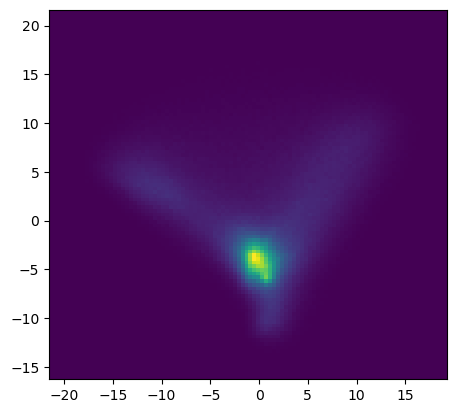

In [16]:
#plt.scatter(embeddings_all[:, 1], embeddings_all[:, 2], s=0.00001)
#plt.show()

heatmap, xedges, yedges = np.histogram2d(embeddings_all[:, 0], embeddings_all[:, 1], bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [17]:

print("Clustering")
#hdb = sklearn.cluster.HDBSCAN(min_cluster_size=10)
#hdb.fit(embeddings_all)
km = sklearn.cluster.MiniBatchKMeans(n_clusters=100)
km.fit(embeddings_all)
del embeddings_all

print("Saving clusters")
df_combined = pandas.read_pickle(Path.home() / "LocalProjects/datasets/im2gps/outputs/im2gps_combined.pkl")
print(f"Clusters: {len(np.unique(km.labels_))}")
df_combined["cluster"] = km.labels_

Clustering
Saving clusters
Clusters: 100


In [47]:
df_combined.to_pickle(Path.home() / "LocalProjects/datasets/im2gps/outputs/clustered/im2gps_combined_with_cluster.pkl")

In [2]:
df_combined = pandas.read_pickle(Path.home() / "LocalProjects/datasets/im2gps/outputs/clustered/im2gps_combined_with_cluster.pkl")

In [26]:
# Filter to only clusters that we care about
clusters_df = pandas.read_csv(Path.home() / "LocalProjects/datasets/im2gps/outputs/clustered/clusters.csv")
clusters_to_include = set(clusters_df[clusters_df.include == "yes"].cluster)

filtered_df = df_combined[df_combined.cluster.isin(clusters_to_include)].copy()

# Make sure every img_path is valid (was 0)
#exists = []
#for img_path in tqdm.tqdm(filtered_df.img_path):
#    exists.append((IMG_ROOT / img_path).exists())
#filtered_df["img_exists"] = exists
#(filtered_df["img_exists"] == False).sum()

filtered_df.to_pickle(Path.home() / "LocalProjects/datasets/im2gps/outputs/clustered/im2gps_filtered.pkl")

Cluster 77, size: 13805


<Figure size 640x480 with 0 Axes>

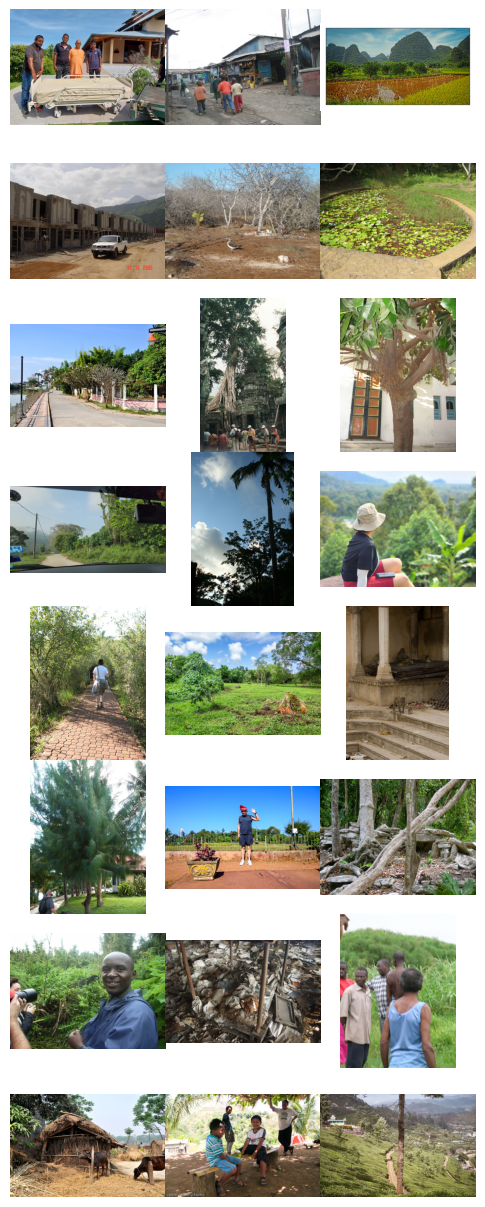

Cluster 78, size: 16495


<Figure size 640x480 with 0 Axes>

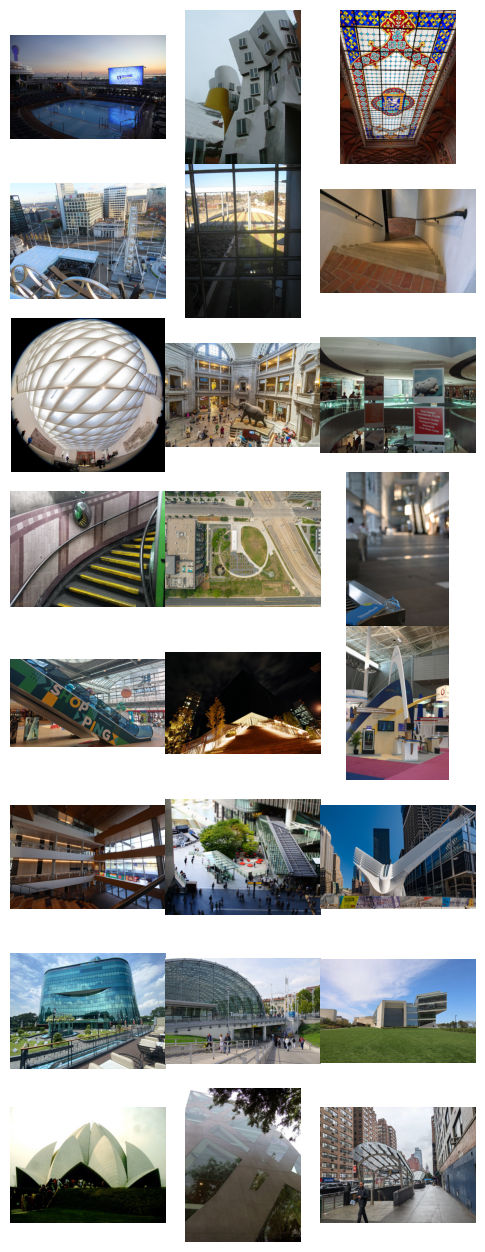

In [15]:
def visualize_cluster_img(n, cluster_img_paths):
    print(f"Cluster {n}, size: {len(cluster_img_paths.index)}")

    plt.clf()
    _, axs = plt.subplots(8, 3, figsize=(6, 16))
    flat_axs = axs.flatten()

    for i, img_path in enumerate(cluster_img_paths.sample(24)):
        image = Image.open(IMG_ROOT / img_path)
        flat_axs[i].set_axis_off()
        flat_axs[i].imshow(image)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

def visualize_cluster(n):
    filtered = df_combined[df_combined["cluster"] == n]
    visualize_cluster_img(n, filtered.img_path)

#start = 90
#for i in range(start, start+10):
#    visualize_cluster(i)
for i in (77, 78):
    visualize_cluster(i)